In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor


In [21]:
df=pd.read_csv('Zillow.csv')
df.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,target
0,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,...,NaN,485713.0,1023282.0,2016.0,537569.0,11013.72,NaN,NaN,6.059063e+13,0.025595
1,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,...,NaN,88000.0,464000.0,2016.0,376000.0,5672.48,NaN,NaN,6.111001e+13,0.055619
2,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,...,NaN,85289.0,564778.0,2016.0,479489.0,6488.30,NaN,NaN,6.059022e+13,0.005383
3,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,...,NaN,108918.0,145143.0,2016.0,36225.0,1777.51,NaN,NaN,6.037300e+13,-0.103410
4,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,...,NaN,73681.0,119407.0,2016.0,45726.0,1533.89,NaN,NaN,6.037124e+13,0.006940


In [22]:
df.shape

(77613, 59)

In [23]:
to_remove = []
for col in df.columns:

    # Removing columns having only one value.
    if df[col].nunique() == 1:
        to_remove.append(col)

    # Removing columns with more than 90% of the
    # rows as null values.
    elif (df[col].isnull()).mean() > 0.60:
        to_remove.append(col)

print(len(to_remove))


30


In [24]:
df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [25]:
df.drop(to_remove,
        axis=1,
        inplace=True)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77613 entries, 0 to 77612
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      77613 non-null  int64  
 1   bathroomcnt                   77579 non-null  float64
 2   bedroomcnt                    77579 non-null  float64
 3   buildingqualitytypeid         49809 non-null  float64
 4   calculatedbathnbr             76963 non-null  float64
 5   calculatedfinishedsquarefeet  77378 non-null  float64
 6   finishedsquarefeet12          73923 non-null  float64
 7   fips                          77579 non-null  float64
 8   fullbathcnt                   76963 non-null  float64
 9   heatingorsystemtypeid         49571 non-null  float64
 10  latitude                      77579 non-null  float64
 11  longitude                     77579 non-null  float64
 12  lotsizesquarefeet             69321 non-null  float64
 13  p

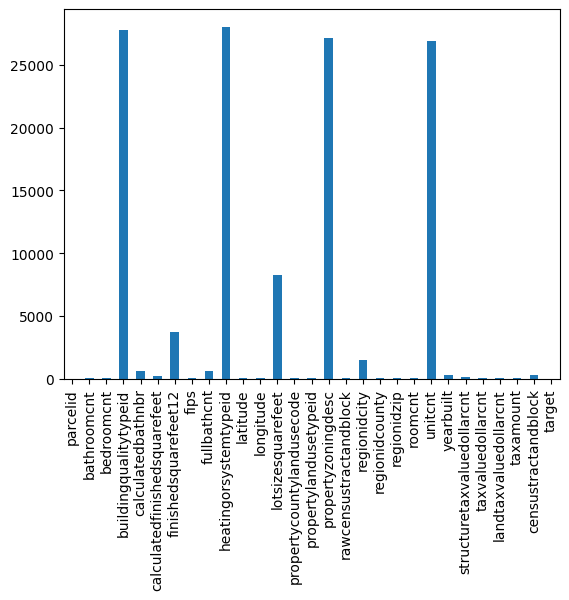

In [27]:
df.isnull().sum().plot.bar()
plt.show()


In [28]:
df.isnull().sum()

,0
parcelid,0
bathroomcnt,34
bedroomcnt,34
buildingqualitytypeid,27804
calculatedbathnbr,650
calculatedfinishedsquarefeet,235
finishedsquarefeet12,3690
fips,34
fullbathcnt,650
heatingorsystemtypeid,28042


In [29]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    elif df[col].dtype == np.number:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


<ipython-input-29-0d6f65b06efa>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  elif df[col].dtype == np.number:


np.int64(0)

In [30]:
df.isnull().sum()

,0
parcelid,0
bathroomcnt,0
bedroomcnt,0
buildingqualitytypeid,0
calculatedbathnbr,0
calculatedfinishedsquarefeet,0
finishedsquarefeet12,0
fips,0
fullbathcnt,0
heatingorsystemtypeid,0


In [32]:
df.dtypes

,0
parcelid,int64
bathroomcnt,float64
bedroomcnt,float64
buildingqualitytypeid,float64
calculatedbathnbr,float64
calculatedfinishedsquarefeet,float64
finishedsquarefeet12,float64
fips,float64
fullbathcnt,float64
heatingorsystemtypeid,float64


In [37]:
ints, objects, floats = [], [], []

for col in df.columns:
    if df[col].dtype == float:
        floats.append(col)
    elif df[col].dtype == int:
        ints.append(col)
    else:
        objects.append(col)

print(f' Total no of Integers: {len(ints)}\n Total no of floats: {len(floats)}\n Total no of objects: {len(objects)}')


 Total no of Integers: 1
 Total no of floats: 26
 Total no of objects: 2


In [38]:
for col in objects:
    print(col, ' -> ', df[col].nunique())
    print(df[col].unique())
    print()


propertycountylandusecode  ->  75
['122' '1110' '0101' '010C' '1129' '0100' '38' '34' '1111' '012C' '010V'
 '1' '0103' '010D' '0200' '010E' '0300' '96' '0104' '0400' '01DC' '01HC'
 '1321' '1410' '0108' '1128' '010G' '1720' '010H' '1210' '0102' '010F'
 '010M' '1117' '0201' '0700' '1722' '73' '0109' '0301' '01HE' '135' '0204'
 '0401' '070D' '0113' '0133' '0131' '1432' '040G' '1112' '1222' '1310'
 '1120' '0111' '1116' '1421' '0110' '0105' '012E' '0141' '1333' '0115'
 '040V' '010L' '040B' '012D' '0114' '0203' '030G' '0130' '105' '020G'
 '020M' '020E']

propertyzoningdesc  ->  1907
['LAR1' 'LCR110000*' 'LAR3' ... 'HAR4-R2*' 'LCR1VV' 'BFA15000*']



<ipython-input-42-97aab79ffd5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['target'])


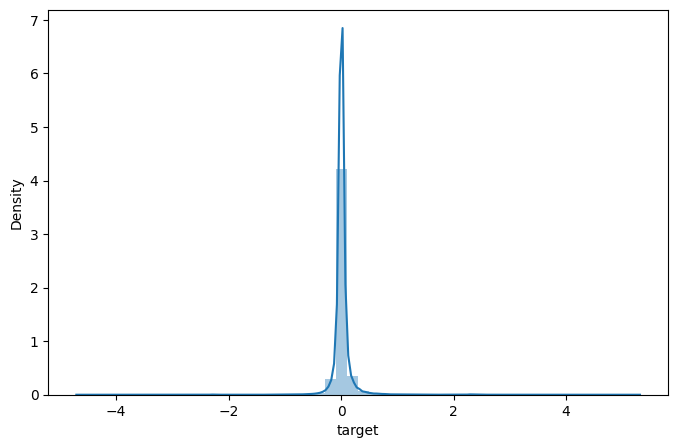

In [42]:
plt.figure(figsize=(8, 5))
sns.distplot(df['target'])
plt.show()

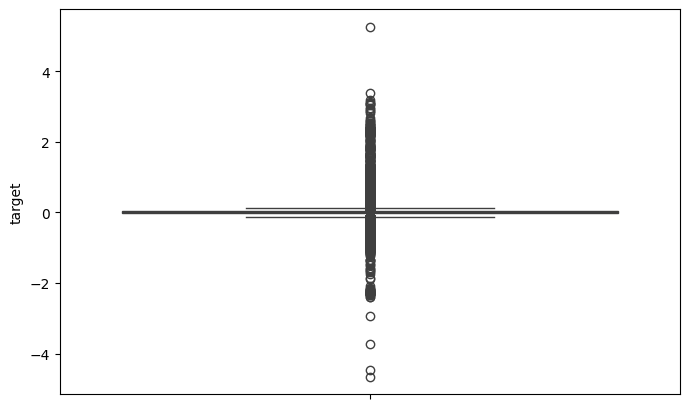

In [44]:
plt.figure(figsize=(8, 5))
sns.boxplot(df['target'])
plt.show()


In [47]:
print('Before removal of outliers', df.shape)
df = df[(df['target'] > -1) & (df['target'] < 1)]
print('After removal of outliers ', df.shape)


Before removal of outliers (77261, 29)
After removal of outliers  (77261, 29)


In [50]:
for col in objects:
  le=LabelEncoder()
  df[col] = le.fit_transform(df[col])


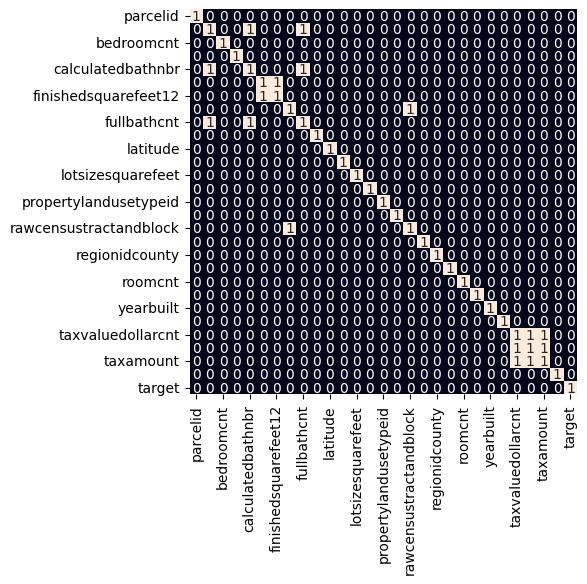

In [52]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr() > 0.8,
           annot=True,
           cbar=False)
plt.show()


In [53]:
df.drop(columns=['calculatedbathnbr','fullbathcnt', 'fips','rawcensustractandblock', 'taxvaluedollarcnt','finishedsquarefeet12', 'landtaxvaluedollarcnt'],axis=1,inplace=True)

In [54]:
df.columns

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'heatingorsystemtypeid', 'latitude',
       'longitude', 'lotsizesquarefeet', 'propertycountylandusecode',
       'propertylandusetypeid', 'propertyzoningdesc', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxamount', 'censustractandblock',
       'target'],
      dtype='object')

In [56]:
x=df.drop(columns=['parcelid'],axis=1)
y=df['target'].values

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

x_train.shape,x_test.shape

((61808, 21), (15453, 21))

In [57]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [63]:
from sklearn.metrics import mean_absolute_error as mae
models=[LinearRegression(),XGBRegressor(),Lasso(),Ridge(),RandomForestRegressor()]

for i in range(5):
  models[i].fit(x_train,y_train)

  print(f'{models[i]} :')

  train_pred = models[i].predict(x_train)
  print('Training Error : ', mae(y_train, train_pred))

  y_pred = models[i].predict(x_test)
  print('Testing Error : ', mae(y_test, y_pred))
  print()


LinearRegression() :
Training Error :  5.052768695624786e-17
Testing Error :  0.001984227879413071

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) :
Training Error :  0.0010401644039348618
Testing Error :  0.006049063257495121

Lasso() :
Training Error :  0.062058966236404875
Testing Error :  0.0629

In [ ]:
_t